# PROJECT TITLE : Top Universities Analysis
## Importing essential libraries.

In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("../datasets/Top_University.csv")
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


# 1. Data Preparation:

In [19]:
null_values = df.isnull().sum()

null_values

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [20]:
df.broad_impact = df.broad_impact.fillna('null')

In [21]:
null_values = df.isnull().sum()

null_values

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [22]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,null,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,null,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,null,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,null,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,null,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [23]:
df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact             object
patents                   int64
score                   float64
year                      int64
dtype: object

In [24]:
df = df.astype({'score': 'int64'})

## Insights :
###  I have handled the missing values by inserting 'null' in the empty space, so that there will not be any empty space.
###  I have also checked and changed the datatype of score from 'float' to 'int'.

# 2. Exploratory Data Analysis (EDA):

In [27]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.338182,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.756714,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.000000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.000000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.000000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000,2015.000000


In [28]:
d= df.groupby('country')['score'].agg(['sum', 'mean'])
d

,sum,mean
country,,
Argentina,310,44.285714
Australia,2628,45.310345
Austria,1074,44.750000
Belgium,931,46.550000
Brazil,1600,44.444444
Bulgaria,88,44.000000
Canada,3376,46.888889
Chile,356,44.500000
China,7453,44.628743


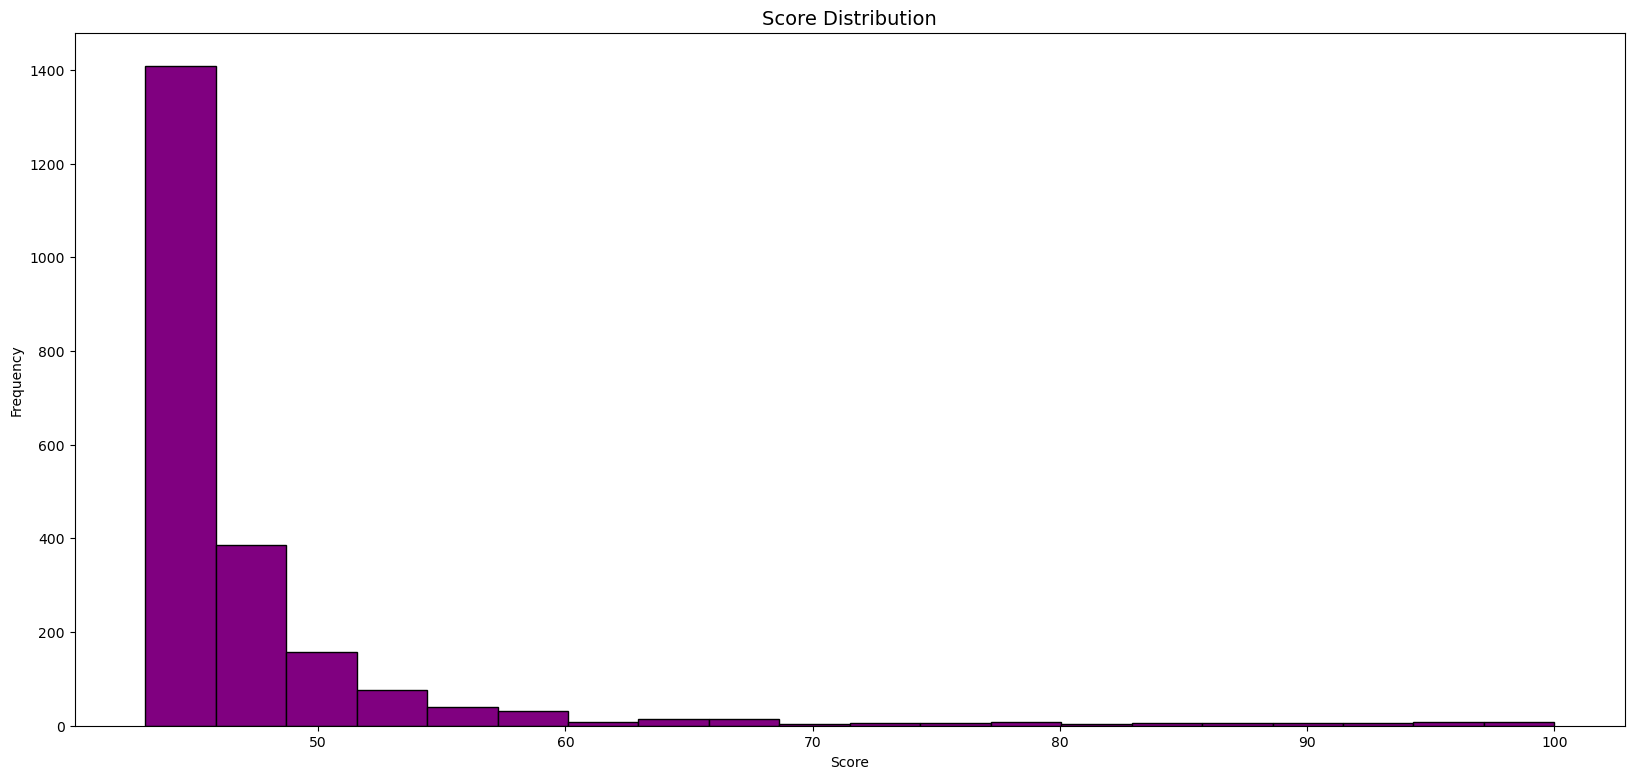

In [29]:
plt.figure(figsize=(20,9))
plt.hist(df.score, bins=20,color = 'purple', edgecolor = 'Black')
plt.title('Score Distribution', fontsize = 14)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## Insights :
###  By doing groupby i found that the every country's average score is in between 40% to 55%.
###  by visualizing score distribution you can see the frequency is dense between 0% to 50%.
###  Only few institution have scored 100%. 


# 3. Top Universities Analysis:
##  What are the top-ranked universities globally?

In [32]:
t_university = df.sort_values(by='score', ascending=False).head(10).reset_index()
t_university

,index,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,null,5,100,2012
1,1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100,2015
2,200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100,2014
3,100,1,Harvard University,USA,1,1,1,1,1,1,1,null,7,100,2013
4,201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99,2014
5,1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98,2015
6,202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98,2014
7,204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97,2014
8,205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97,2014
9,203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97,2014


## Insights :
### Following are the top ranked institution:- 
### Harvard University, Stanford University, Massachusetts Institute of Technology, University of Oxford, Columbia University, University of Cambridge.

##  What is the distribution of top universities across different countries?

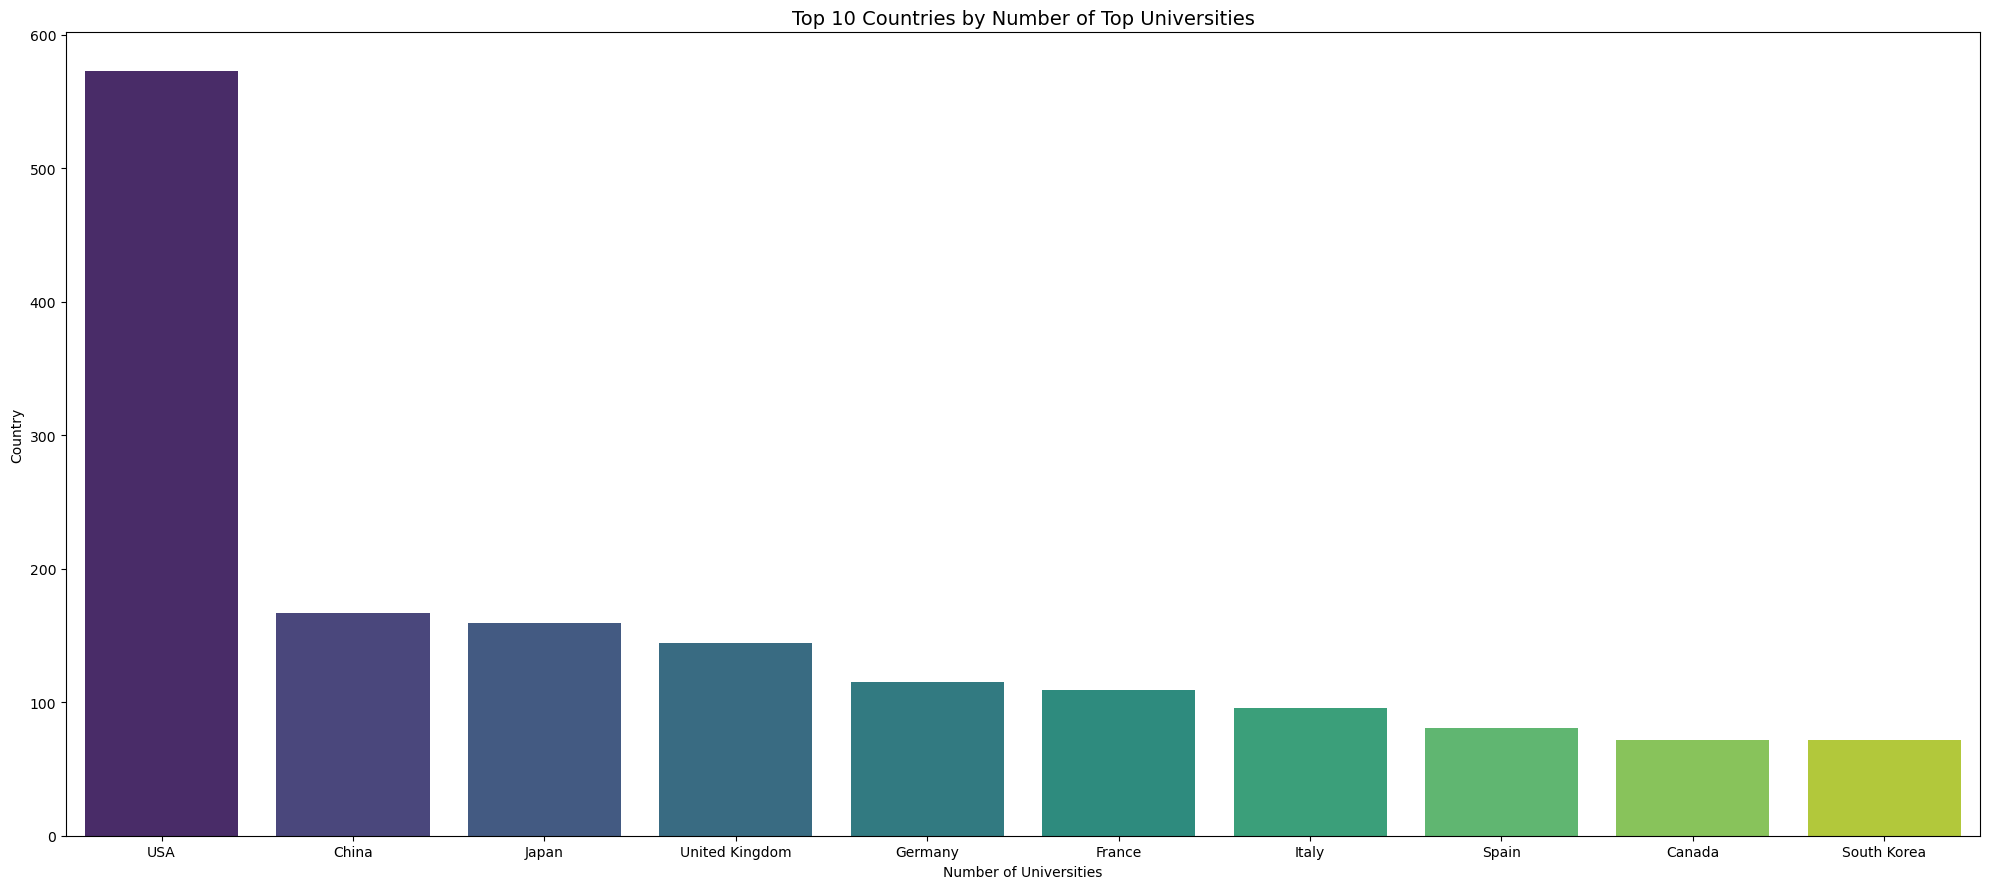

In [34]:
ss = df['country'].value_counts().reset_index().head(10)
ss.columns = ['Country', 'institution']
ss

plt.figure(figsize=(20, 9))
sb.barplot(data=ss.head(10), x='Country' , y='institution', palette='viridis')
plt.title("Top 10 Countries by Number of Top Universities",fontsize = 14)
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## Insights :
### USA has the most top universities situated in their country.
### Other 9 countries each have around 100 to 180 top universities situated in their country.

# 4. Country Performance:
##  Which countries have the most universities in the top 100 rankings?

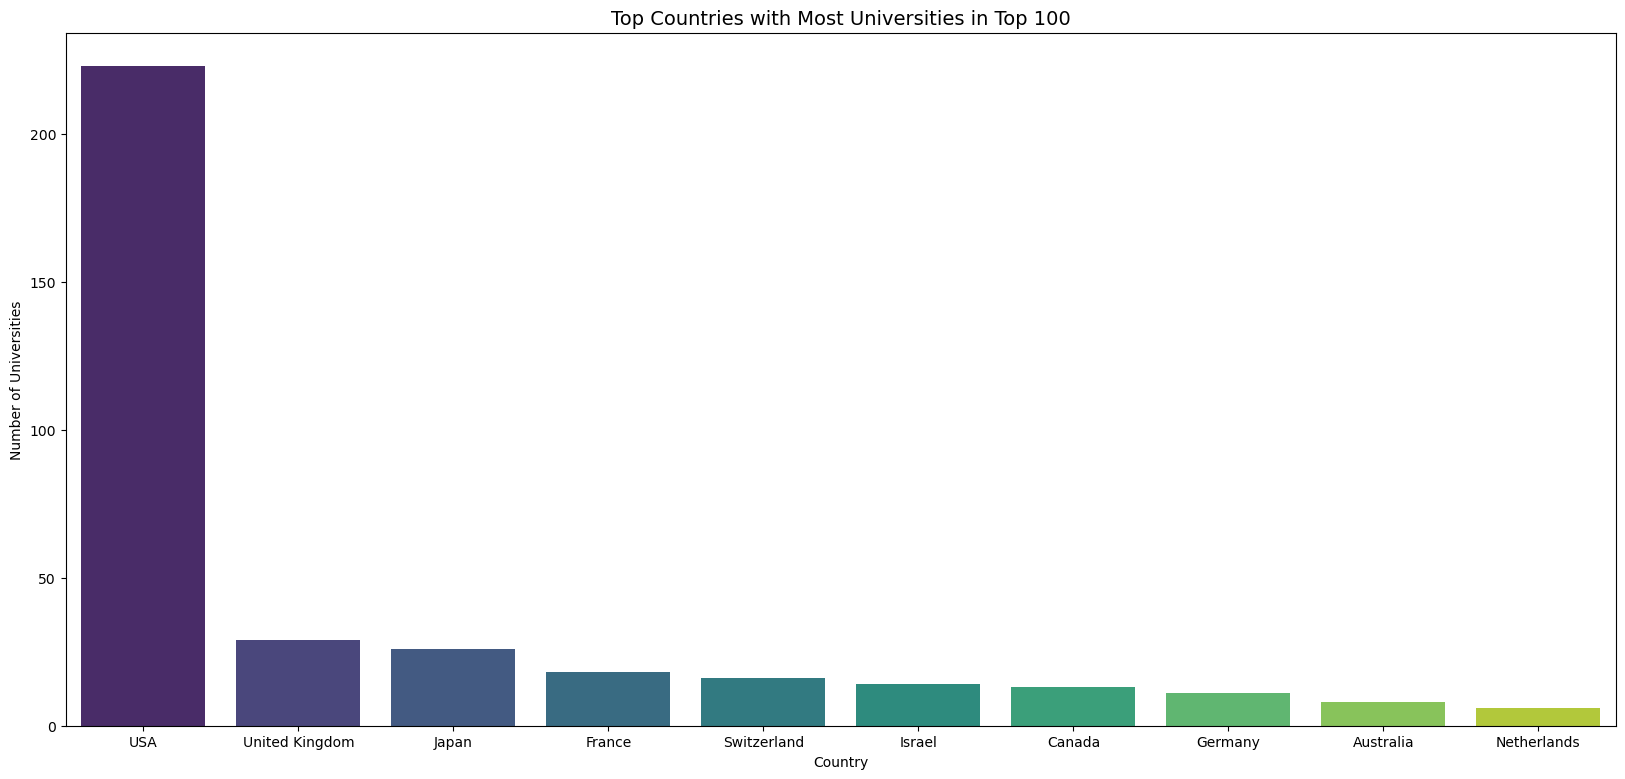

In [36]:
n = df[df['world_rank'] <= 100]

bb = n['country'].value_counts().reset_index()
bb.columns = ['Country', 'University Count']
bb

plt.figure(figsize=(20, 9))
sb.barplot(data=bb.head(10), x='Country', y='University Count', palette='viridis')
plt.title("Top Countries with Most Universities in Top 100", fontsize = 14)
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.show()

## Insights :
### USA has the most top universities which are in the top 100 rankings situated in their country.¶
### Other 9 countries each have around 10 to 30 top universities which are in the top 100 rankings situated in their country.

##  How do different countries compare based on their average ranking scores?

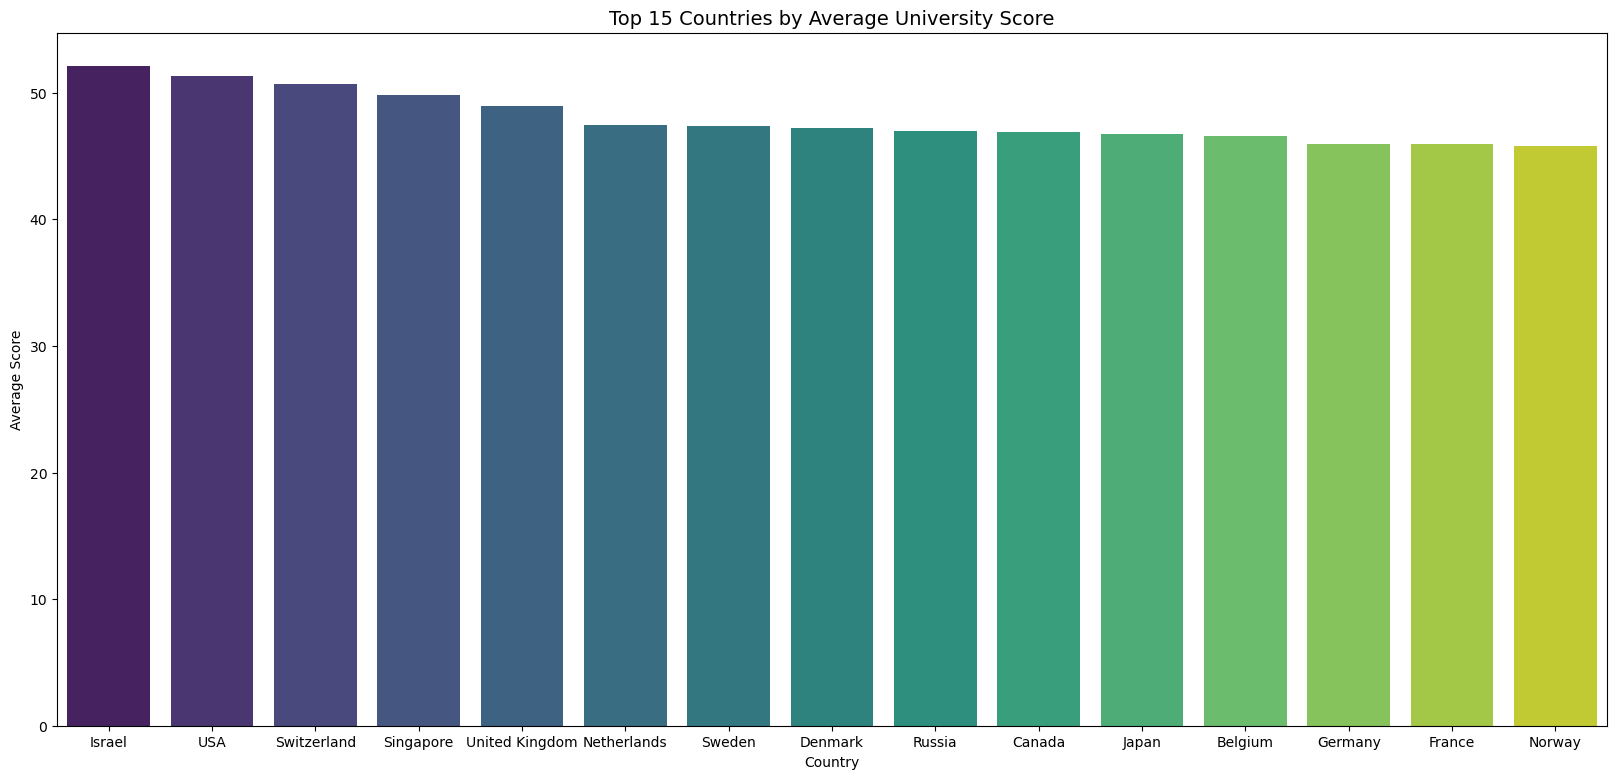

In [38]:
jj = df.groupby('country')['score'].mean().reset_index()
jj = jj.sort_values(by='score', ascending=False)
jj

plt.figure(figsize=(20, 9))
sb.barplot(data=jj.head(15), x='country', y='score', palette='viridis')
plt.title("Top 15 Countries by Average University Score", fontsize = 14)
plt.xlabel("Country")
plt.ylabel("Average Score")
plt.show()

## Insights :
### As we can see from 15 top countries Israel has the highest average score.
### Then the average starts score decline upto 44%.

# 5. Factor Analysis:
##  What factors contribute most to a university's overall ranking?

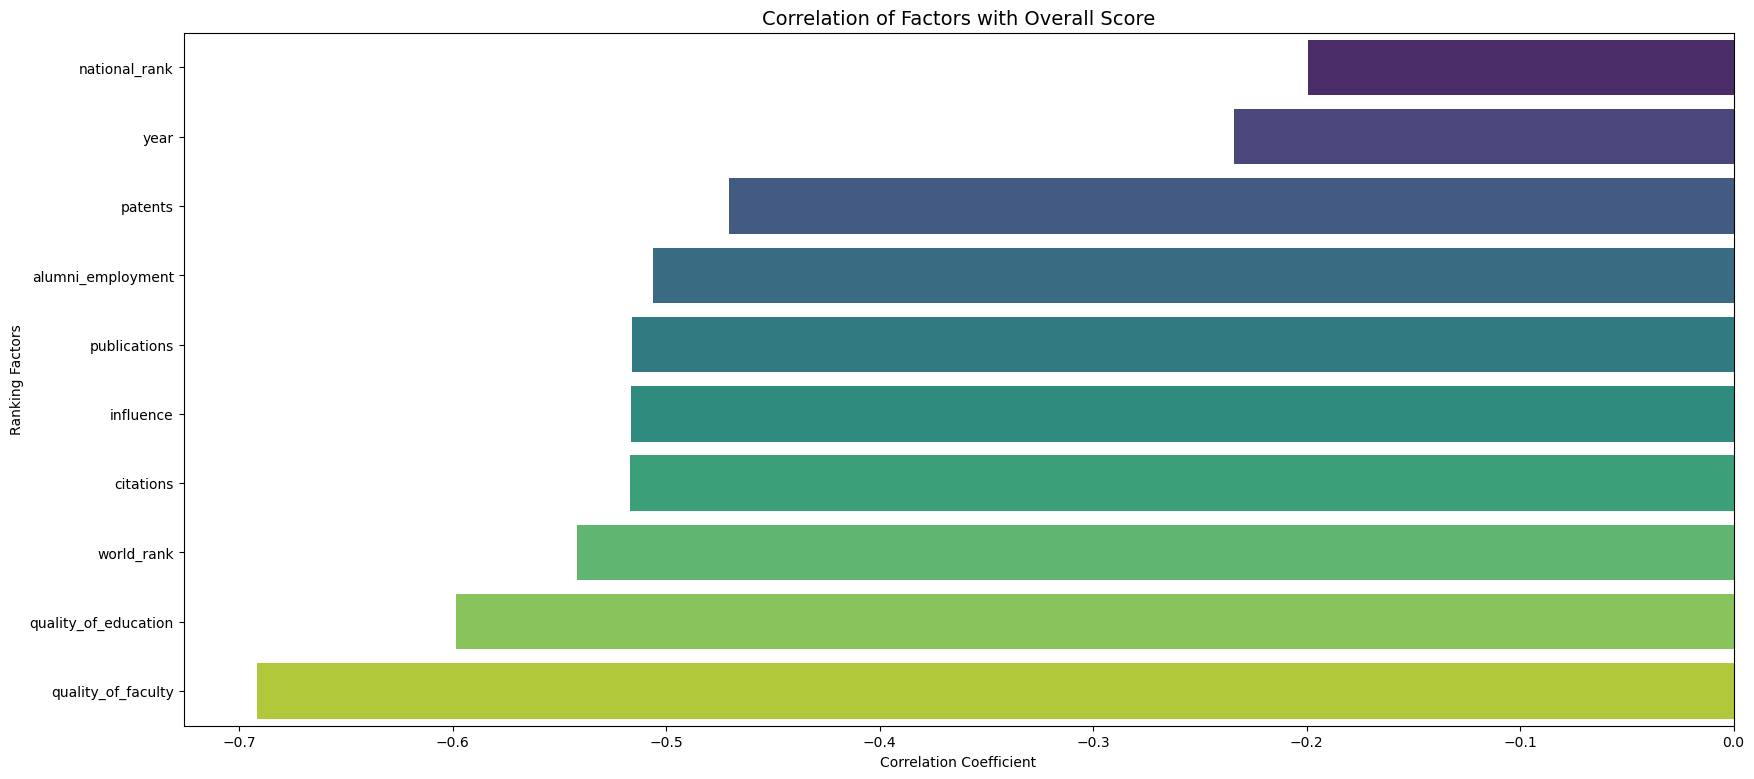

In [106]:
jd = df.corr(numeric_only=True)['score'].drop('score').sort_values(ascending=False)
jd

plt.figure(figsize=(20, 9))
sb.barplot(x=jd.values, y=jd.index, palette='viridis')
plt.title("Correlation of Factors with Overall Score", fontsize = 14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Ranking Factors")
plt.show()

## Insights :
### All correlations are negative, meaning that as each of these variables increases (e.g., better rank, more patents, higher quality), the target variable tends to decrease.
### The strongest correlations are with quality_of_faculty, quality_of_education, and world_rank, suggesting these have the most significant inverse relationships with the target variable.
### Weaker correlations (e.g., national_rank, year) indicate less influence on the target variable.

##  How does research impact (Citations, Publications, Broad Impact) influence rankings?

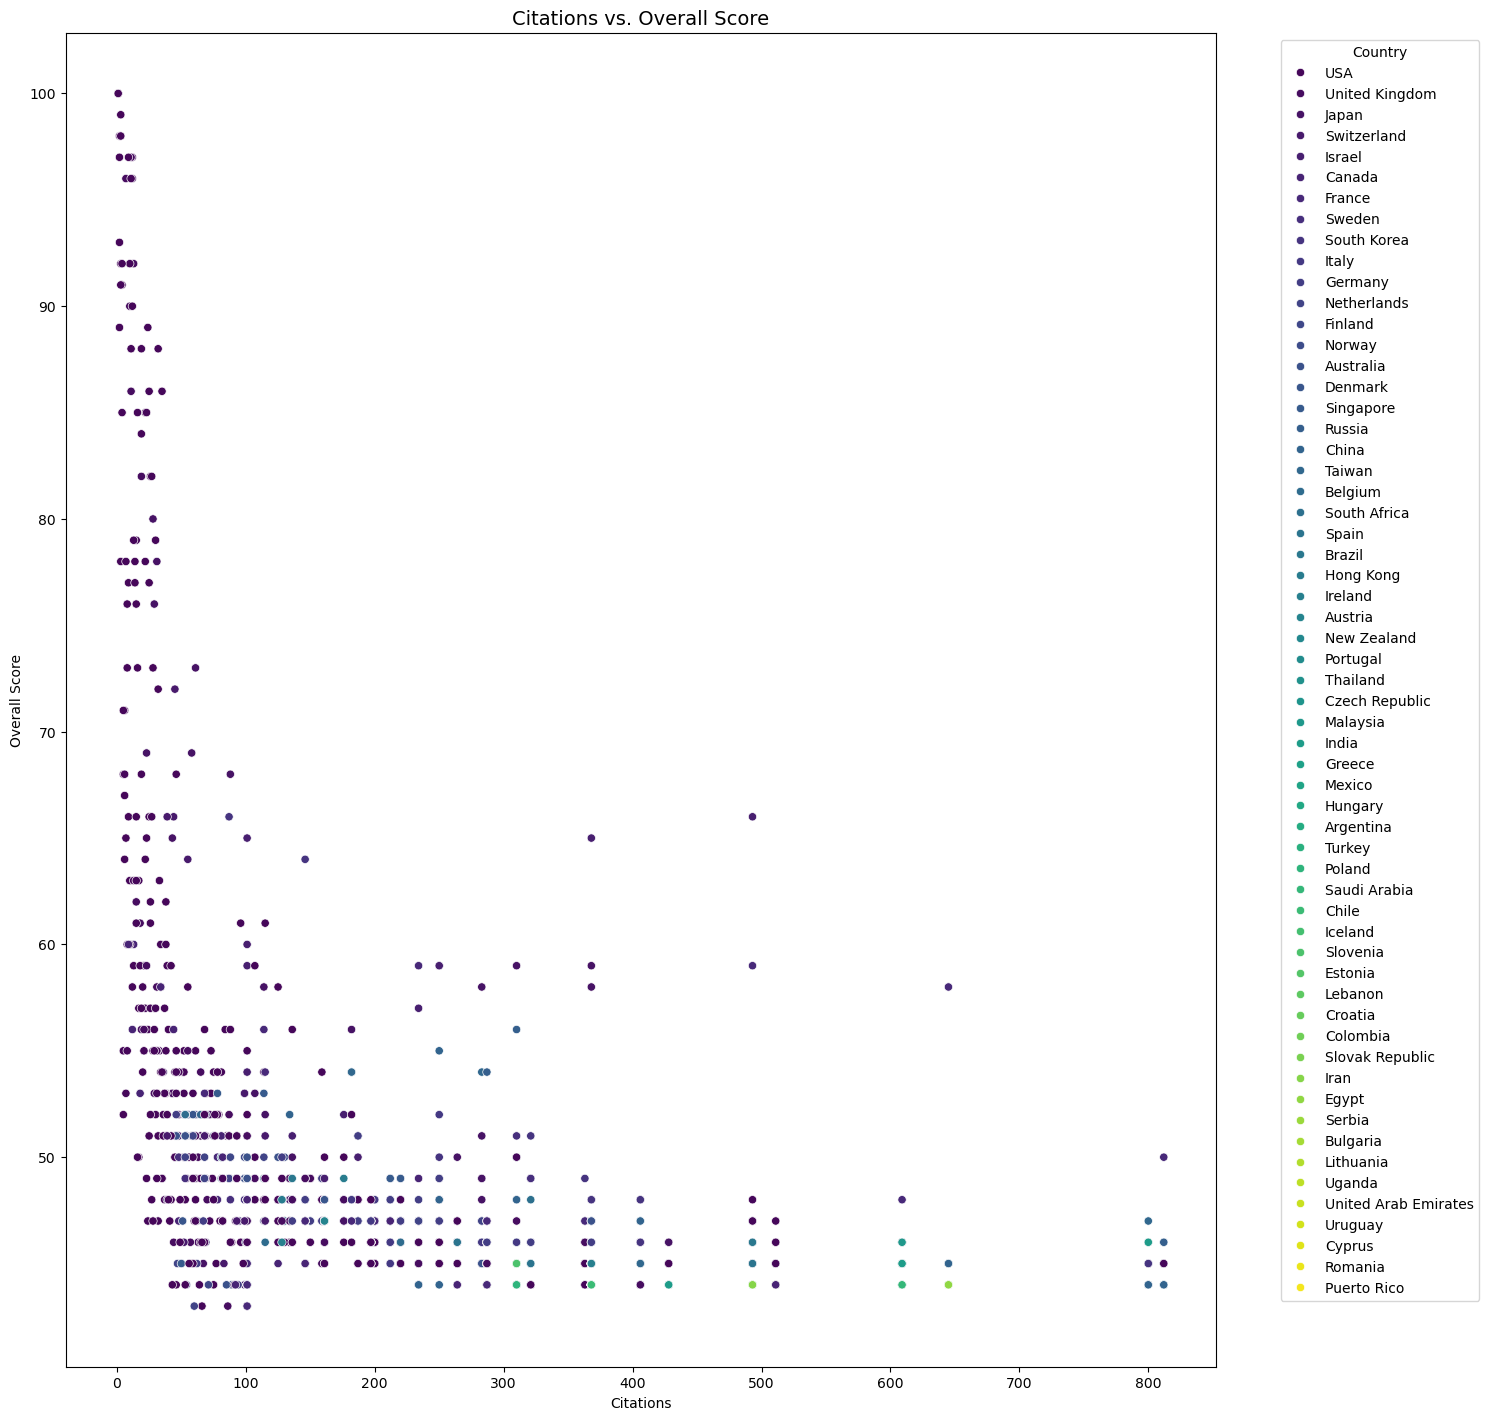

In [112]:
plt.figure(figsize=(15, 15))
sb.scatterplot(data=df, x='citations', y='score', hue='country', palette='viridis')

plt.title('Citations vs. Overall Score', fontsize = 14)
plt.xlabel('Citations')
plt.ylabel('Overall Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Insights :
### Strong Negative Correlation (-0.517107):
### Countries with more citations (high research impact) score lower on the target variable. 
### USA, Japan, United Kingdom have low citation value means high score.
### Cyprus, Romania, Puerto Rico have high citation value means low score.

##  How do Quality of Education, Alumni Employment, and Faculty Quality correlate with rankings?

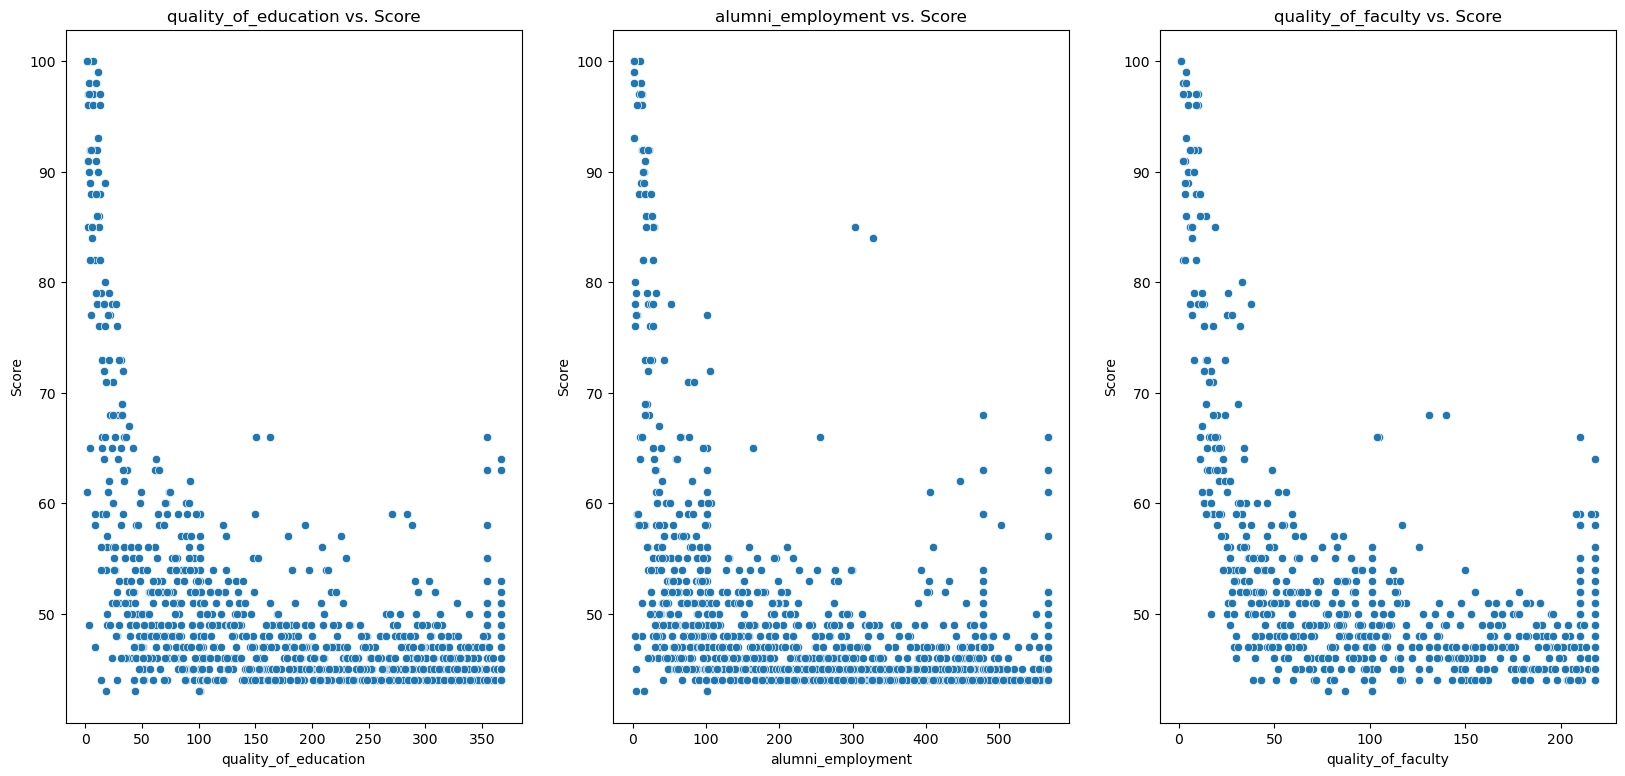

In [44]:
factors = ['quality_of_education', 'alumni_employment', 'quality_of_faculty'] 
plt.figure(figsize=(20, 9))

for i, factor in enumerate(factors):
    plt.subplot(1, 3, i+1)
    sb.scatterplot(data=df, x=factor, y='score', palette='viridis')
    plt.title(f'{factor} vs. Score')
    plt.xlabel(factor)
    plt.ylabel('Score')

plt.show()

## Insights :
### All three graphs shows the Strong Negative relationship with score.
### As seen lesser the values count higher the score.

#  6. Trend Analysis:
##  How have university rankings changed over time?

In [46]:
dj = df[['year','institution','world_rank']]
dj



,year,institution,world_rank
0,2012,Harvard University,1
1,2012,Massachusetts Institute of Technology,2
2,2012,Stanford University,3
3,2012,University of Cambridge,4
4,2012,California Institute of Technology,5
...,...,...,...
2195,2015,University of the Algarve,996
2196,2015,Alexandria University,997
2197,2015,Federal University of Ceará,998
2198,2015,University of A Coruña,999


In [47]:
dj[dj.year==2013]

,year,institution,world_rank
100,2013,Harvard University,1
101,2013,Stanford University,2
102,2013,University of Oxford,3
103,2013,Massachusetts Institute of Technology,4
104,2013,University of Cambridge,5
...,...,...,...
195,2013,Australian National University,96
196,2013,University of Alberta,97
197,2013,University of Helsinki,98
198,2013,Paris Diderot University - Paris 7,99


## Insights :
### Harvard University, Stanford University, Massachusetts Institute of Technology, University of Oxford,          Columbia University, University of Cambridge have secured their place under top 10 across the years.
### Rest institution which are under 100 have shown a positive growth every year.

##  Are there universities that consistently improve or decline in rankings?

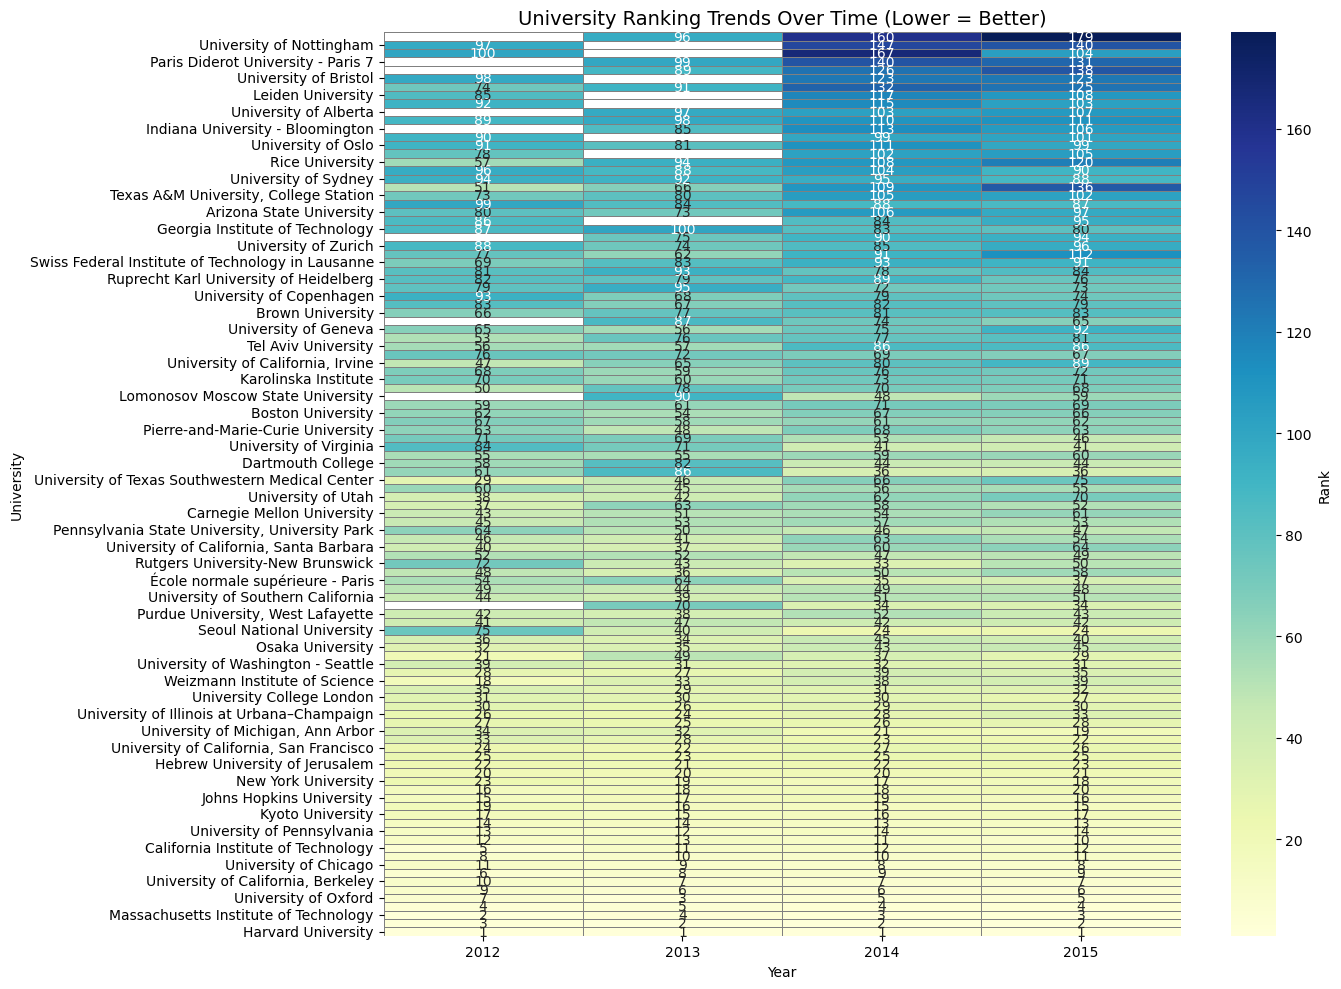

In [49]:
yt = df.pivot(index= 'institution', columns= 'year', values= 'world_rank')

yt = yt.dropna(thresh=3) 

yt['Mean Rank'] = yt.mean(axis=1)
yt = yt.sort_values('Mean Rank').drop(columns ='Mean Rank')

plt.figure(figsize=(14, 10))
sb.heatmap(yt, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.7, linecolor='gray', cbar_kws={'label': 'Rank'})
plt.title("University Ranking Trends Over Time (Lower = Better)",fontsize = 14)
plt.xlabel("Year")
plt.ylabel("University")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

## Insights : 
### Yes, there are institutions which are consistantly showing growth in their rank.
### Let's see New York University ranking trend. In 2012-23 and in 2015-18, it shows consistant growth.
### Also there are such Universities whose rank is declining overtime.
### Let's see Osaka University ranking trend. In 2012-32 and in 2015-454, it shows decline in rank.